##Import the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection  import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings("ignore")

In [3]:
train = pd.read_csv('/content/train_u6lujuX_CVtuZ9i.csv')
test = pd.read_csv('/content/test_Y3wMUE5_7gLdaTN.csv')
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
print(f'train_shape{train.shape}')
print(f'test_shape{test.shape}')

train_shape(614, 13)
test_shape(367, 12)


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
pd.DataFrame({'count': train.shape[0],
              'nulls': train.isnull().sum(),
              'nulls%': train.isnull().mean() * 100,
              'cardinality': train.nunique(),
             })

,count,nulls,nulls%,cardinality
Loan_ID,614,0,0.000000,614
Gender,614,13,2.117264,2
Married,614,3,0.488599,2
Dependents,614,15,2.442997,4
Education,614,0,0.000000,2
Self_Employed,614,32,5.211726,2
ApplicantIncome,614,0,0.000000,505
CoapplicantIncome,614,0,0.000000,287
LoanAmount,614,22,3.583062,203
Loan_Amount_Term,614,14,2.280130,10


In [7]:
pd.DataFrame({'count': test.shape[0],
              'nulls': test.isnull().sum(),
              'nulls%': test.isnull().mean() * 100,
              'cardinality': test.nunique(),
             })

,count,nulls,nulls%,cardinality
Loan_ID,367,0,0.000000,367
Gender,367,11,2.997275,2
Married,367,0,0.000000,2
Dependents,367,10,2.724796,4
Education,367,0,0.000000,2
Self_Employed,367,23,6.267030,2
ApplicantIncome,367,0,0.000000,314
CoapplicantIncome,367,0,0.000000,194
LoanAmount,367,5,1.362398,144
Loan_Amount_Term,367,6,1.634877,12


In [8]:
print(f'train_duplicated: {train.duplicated().sum()}')
print(f'test_duplicated: {test.duplicated().sum()}')

train_duplicated: 0
test_duplicated: 0


In [9]:
for col in ["Gender", "Married","Dependents", "Self_Employed", "Credit_History"]:
    train[col].fillna(train[col].mode()[0], inplace=True)

for col in ["ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term"]:
    train[col].fillna(train[col].mean(), inplace=True)

In [10]:
for col in ["Gender", "Dependents", "Self_Employed", "Credit_History"]:
    test[col].fillna(test[col].mode()[0], inplace=True)

for col in ["LoanAmount", "Loan_Amount_Term"]:
    test[col].fillna(test[col].mean(), inplace=True)

In [11]:
train.drop("Loan_ID", axis=1, inplace=True)
test.drop("Loan_ID", axis=1, inplace=True)

In [12]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.855049
std,6109.041673,2926.248369,84.037468,64.372489,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [13]:
train.corr(numeric_only=True)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.565620,-0.045242,-0.018615
CoapplicantIncome,-0.116605,1.000000,0.187828,-0.059675,0.011134
LoanAmount,0.565620,0.187828,1.000000,0.038801,-0.001431
Loan_Amount_Term,-0.045242,-0.059675,0.038801,1.000000,0.000432
Credit_History,-0.018615,0.011134,-0.001431,0.000432,1.000000


##Outliers

In [14]:
train.skew(numeric_only=True)

,0
ApplicantIncome,6.539513
CoapplicantIncome,7.491531
LoanAmount,2.726601
Loan_Amount_Term,-2.389680
Credit_History,-2.021971


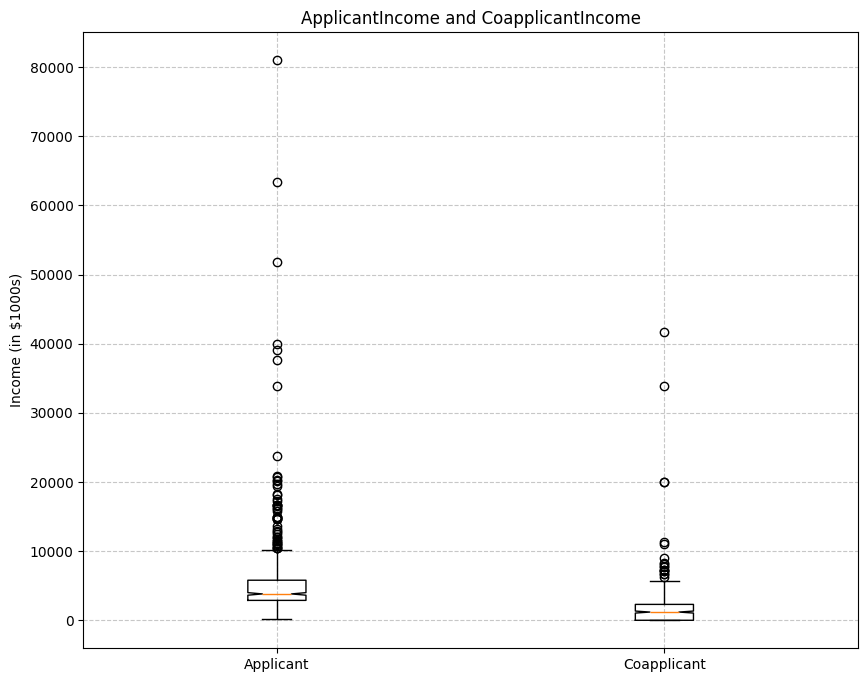

In [15]:
plt.figure(figsize=(10, 8))
plt.boxplot([train['ApplicantIncome'], train['CoapplicantIncome']], labels=['Applicant', 'Coapplicant'], notch=True)
#plt.boxplot(train.values(), notch=True, labels=train.keys())  # Create the box plot with notches
plt.title('ApplicantIncome and CoapplicantIncome')
plt.ylabel('Income (in $1000s)')  # Label the y-axis
plt.grid(True, linestyle='--', alpha=0.7)  # Add grid lines with dashed style and 70% opacity

plt.show()  # Display the plot

In [16]:
train["ApplicantIncome"] = np.log1p(train["ApplicantIncome"])
train["CoapplicantIncome"] = np.log1p(train["CoapplicantIncome"])

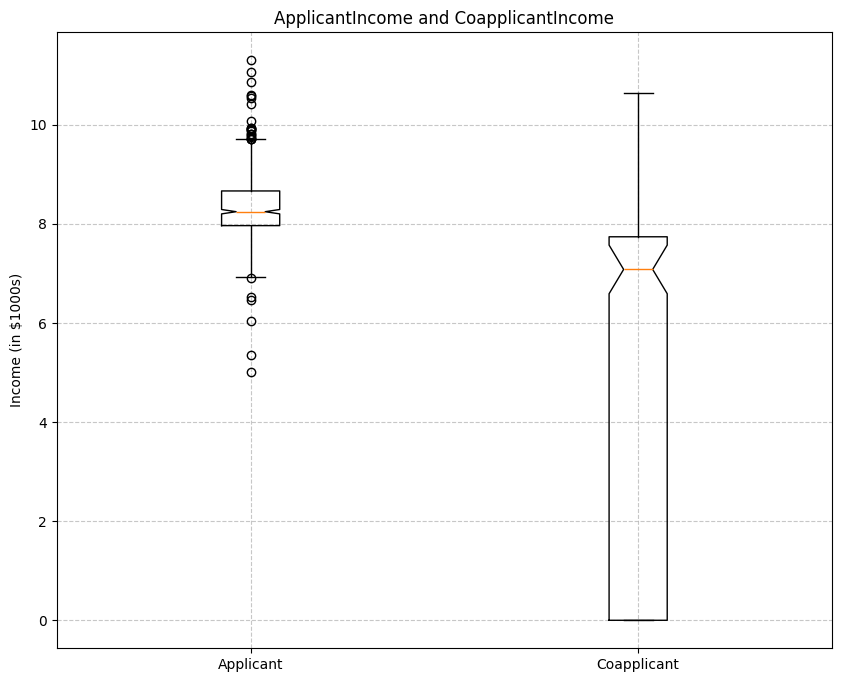

In [17]:
plt.figure(figsize=(10, 8))
plt.boxplot([train['ApplicantIncome'], train['CoapplicantIncome']], labels=['Applicant', 'Coapplicant'], notch=True)
#plt.boxplot(train.values(), notch=True, labels=train.keys())  # Create the box plot with notches
plt.title('ApplicantIncome and CoapplicantIncome')
plt.ylabel('Income (in $1000s)')  # Label the y-axis
plt.grid(True, linestyle='--', alpha=0.7)  # Add grid lines with dashed style and 70% opacity

plt.show()  # Display the plot

##Analysis

In [18]:
train['Gender'].value_counts()

,count
Gender,
Male,502
Female,112


In [19]:
train['Married'].value_counts()

,count
Married,
Yes,401
No,213


In [20]:
train['Education'].value_counts()

,count
Education,
Graduate,480
Not Graduate,134


In [21]:
train['Self_Employed'].value_counts()

,count
Self_Employed,
No,532
Yes,82


In [22]:
train['Credit_History'].value_counts()

,count
Credit_History,
1.0,525
0.0,89


In [24]:
train['Loan_Status'].value_counts()

,count
Loan_Status,
Y,422
N,192


In [25]:
def pie(col):
    plt.pie(
        train[col].value_counts(),
        labels=train[col].value_counts().index,
        autopct='%0.1f%%',
        startangle=140,
        colors=['#66b3ff', '#ff9999'],
        explode=(0.1, 0),
        shadow=True,
        wedgeprops=dict(width=0.7, edgecolor='w')
    )

    plt.title(col, fontsize=22, fontweight='bold')

    plt.legend(
        title=col,
        title_fontsize='18',
        loc='upper left',
        bbox_to_anchor=(1, 1)
    )

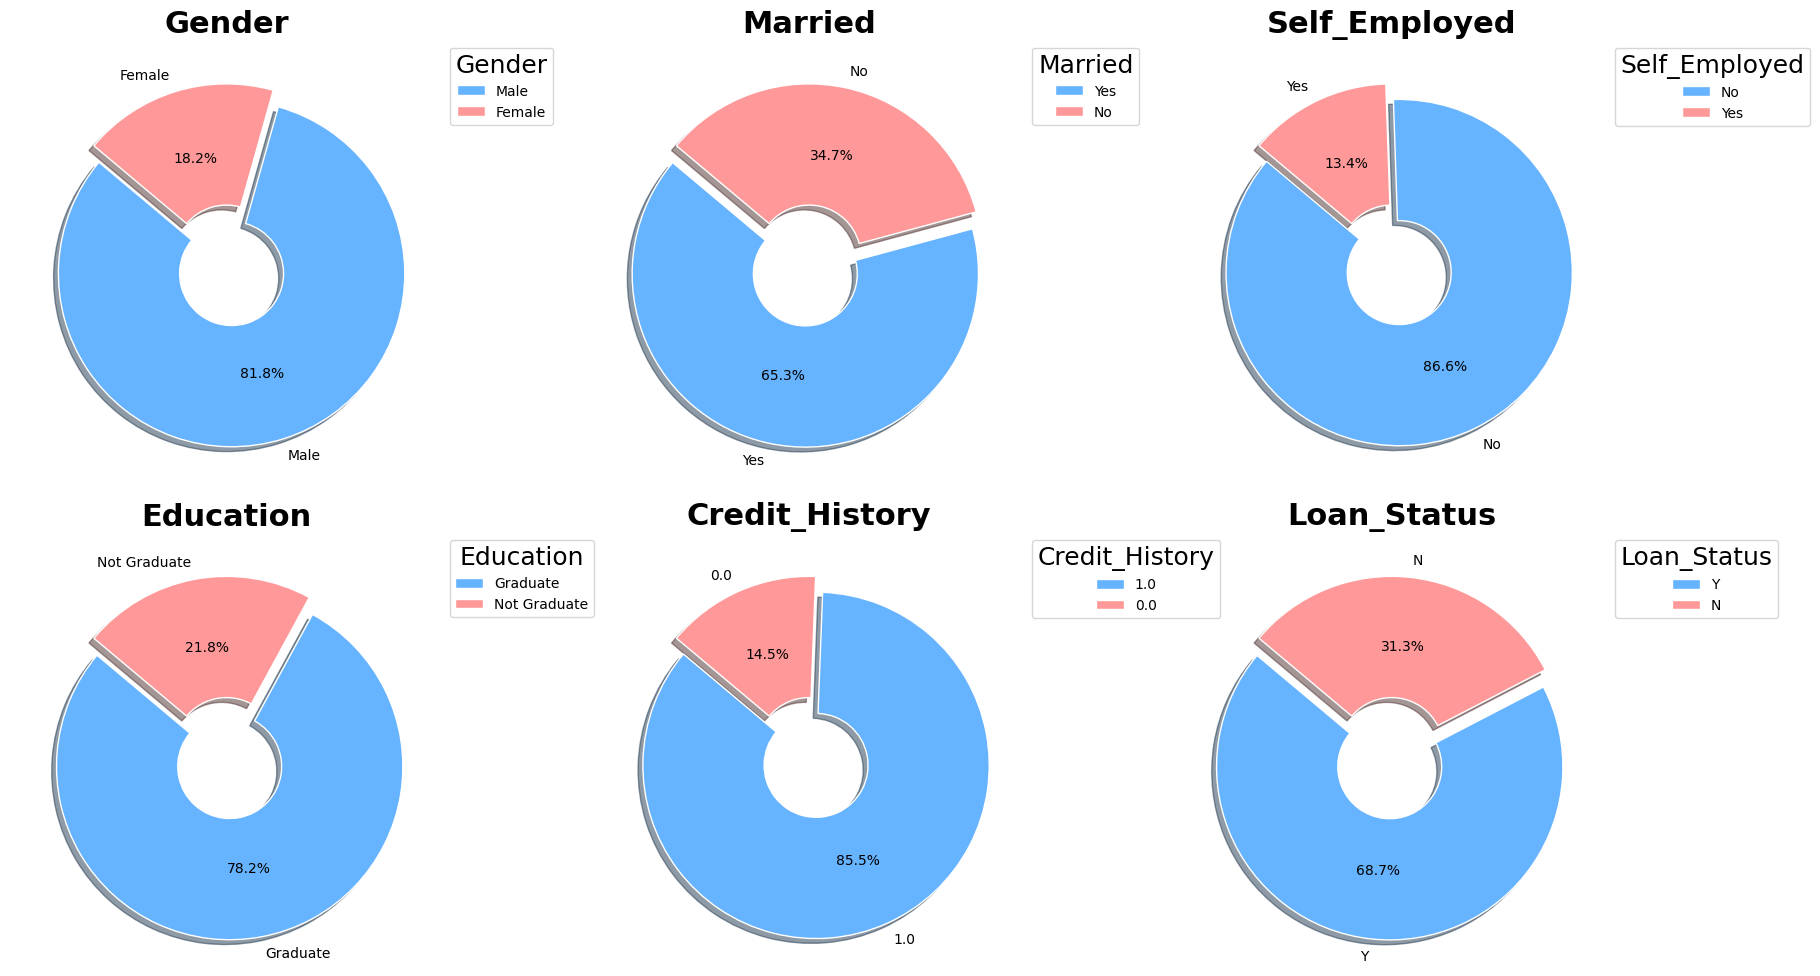

In [26]:
plt.figure(figsize=(18, 10))
columns = ['Gender', 'Married', 'Self_Employed', 'Education', 'Credit_History', 'Loan_Status']
i = 1
for col in columns:
    plt.subplot(2, 3, i)
    pie(col)
    i += 1

plt.tight_layout()
plt.show()

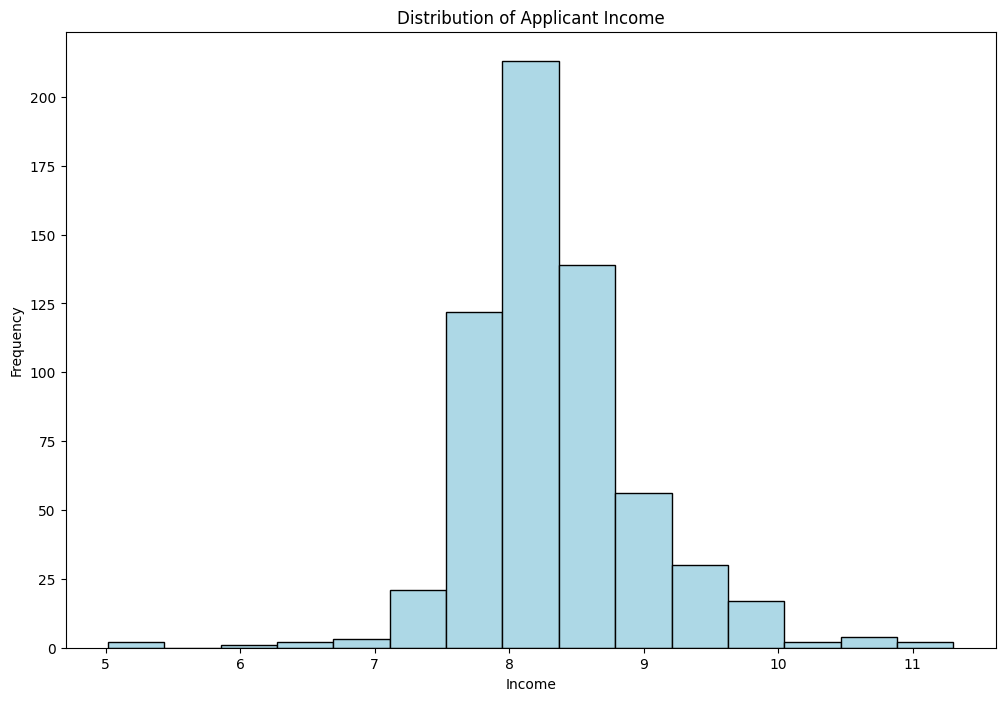

In [27]:
plt.figure(figsize=(12, 8))
plt.hist(train['ApplicantIncome'], bins=15, color='lightblue', edgecolor='black')

plt.xlabel('Income')
plt.ylabel('Frequency')
plt.title('Distribution of Applicant Income')

plt.show()

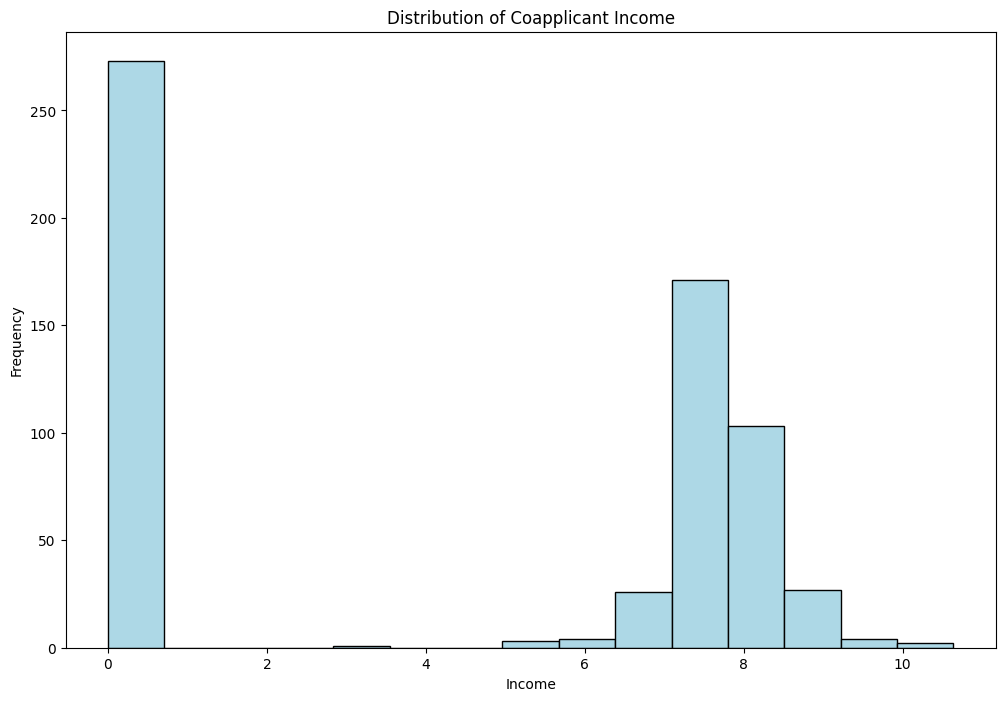

In [28]:
plt.figure(figsize=(12, 8))
plt.hist(train['CoapplicantIncome'], bins=15, color='lightblue', edgecolor='black')

plt.xlabel('Income')
plt.ylabel('Frequency')
plt.title('Distribution of Coapplicant Income')

plt.show()

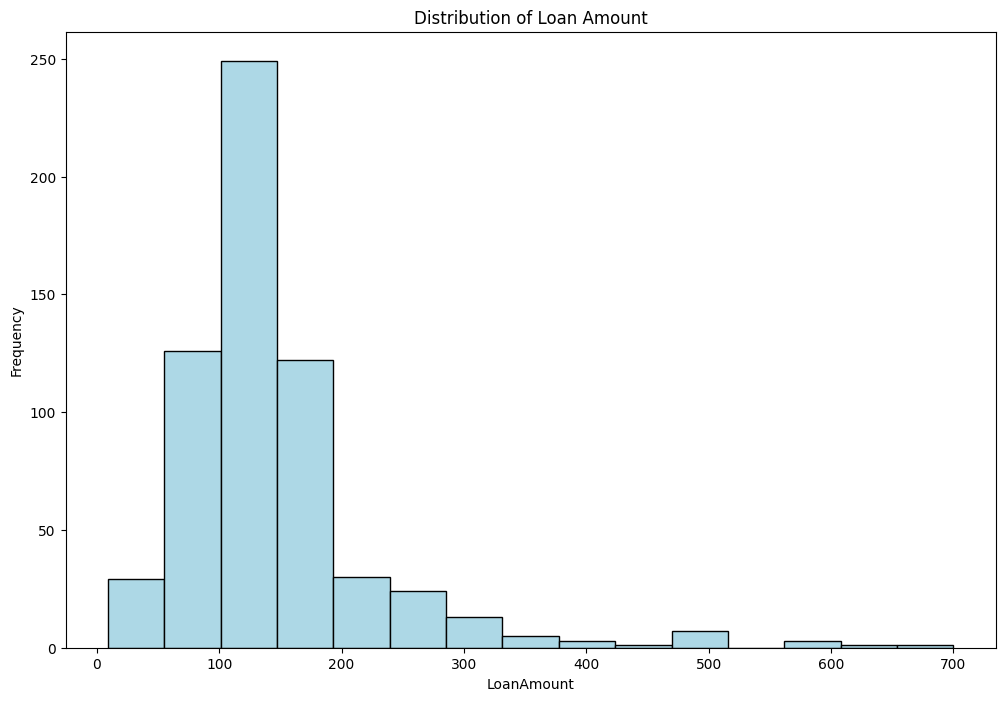

In [29]:
plt.figure(figsize=(12, 8))
plt.hist(train['LoanAmount'], bins=15, color='lightblue', edgecolor='black')

plt.xlabel('LoanAmount')
plt.ylabel('Frequency')
plt.title('Distribution of Loan Amount')

plt.show()

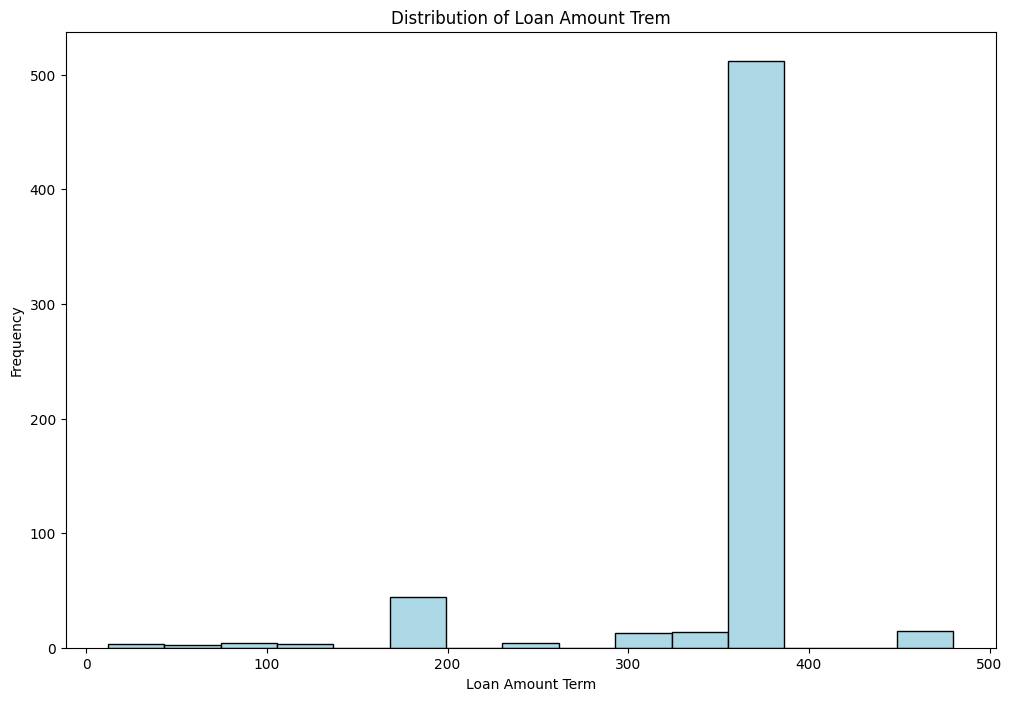

In [30]:
plt.figure(figsize=(12, 8))
plt.hist(train['Loan_Amount_Term'], bins=15, color='lightblue', edgecolor='black')

plt.xlabel('Loan Amount Term')
plt.ylabel('Frequency')
plt.title('Distribution of Loan Amount Trem')

plt.show()

In [31]:
train['LoanAmount'].describe()

,LoanAmount
count,614.000000
mean,146.412162
std,84.037468
min,9.000000
25%,100.250000
50%,129.000000
75%,164.750000
max,700.000000


In [32]:
train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,8.674197,0.000000,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,8.430327,7.319202,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,8.006701,0.000000,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,7.857094,7.765993,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,8.699681,0.000000,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,7.972811,0.000000,71.000000,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,8.320448,0.000000,40.000000,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8.996280,5.484797,253.000000,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,8.933796,0.000000,187.000000,360.0,1.0,Urban,Y


##Preprocessing

In [33]:
columns = ["Gender", "Married", "Dependents", "Education", "Self_Employed", 'Property_Area']
encoders = {}
for col in columns:
    label = LabelEncoder()
    train[col] = label.fit_transform(train[col])
    test[col] = label.transform(test[col])
    encoders[col] = label

train["Loan_Status"] = train["Loan_Status"].map({'N':0, 'Y':1})

In [34]:
X = train.drop(columns = ["Loan_Status"], axis=1)
y = train["Loan_Status"]

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [36]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

##Model random forest

In [37]:
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight="balanced")

In [38]:
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [39]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8373983739837398
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.61      0.70        38
           1       0.84      0.94      0.89        85

    accuracy                           0.84       123
   macro avg       0.83      0.77      0.79       123
weighted avg       0.84      0.84      0.83       123



ApplicantIncome      0.220330
LoanAmount           0.207597
Credit_History       0.201711
CoapplicantIncome    0.114580
Dependents           0.056006
Property_Area        0.052781
Loan_Amount_Term     0.048249
Education            0.029179
Married              0.026325
Self_Employed        0.023043
Gender               0.020198
dtype: float64


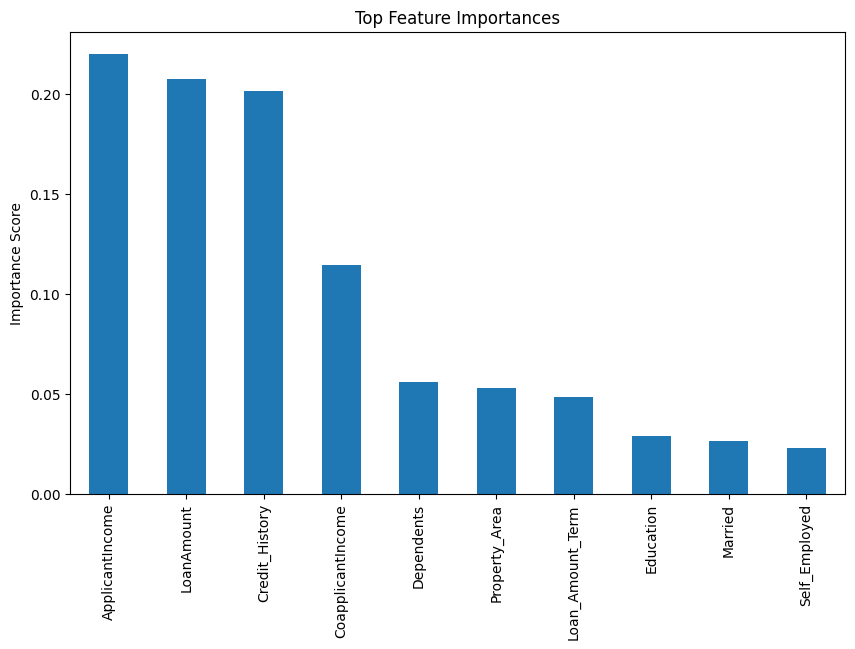

In [40]:
importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

print(importances)

plt.figure(figsize=(10,6))
importances.head(10).plot(kind='bar')
plt.title("Top Feature Importances")
plt.ylabel("Importance Score")
plt.show()